<a href="https://colab.research.google.com/github/ShreshthSaxena/YOLO/blob/master/yolo3_keras%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import files
files.upload()

Saving yolo.py to yolo.py


{'yolo.py': b'# -*- coding: utf-8 -*-\n"""\nClass definition of YOLO_v3 style detection model on image and video\n"""\n\nimport colorsys\nimport os\nfrom timeit import default_timer as timer\n\nimport numpy as np\nfrom keras import backend as K\nfrom keras.models import load_model\nfrom keras.layers import Input\nfrom PIL import Image, ImageFont, ImageDraw\n\nfrom yolo3.model import yolo_eval, yolo_body, tiny_yolo_body\nfrom yolo3.utils import letterbox_image\nimport os\nfrom keras.utils import multi_gpu_model\n\nclass YOLO(object):\n    _defaults = {\n        "model_path": \'model_data/yolo.h5\',\n        "anchors_path": \'model_data/yolo_anchors.txt\',\n        "classes_path": \'model_data/coco_classes.txt\',\n        "score" : 0.3,\n        "iou" : 0.45,\n        "model_image_size" : (416, 416),\n        "gpu_num" : 1,\n    }\n\n    @classmethod\n    def get_defaults(cls, n):\n        if n in cls._defaults:\n            return cls._defaults[n]\n        else:\n            return "Unr

In [1]:
!git clone https://github.com/qqwweee/keras-yolo3

Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 151.24 KiB | 10.80 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [2]:
cd keras-yolo3

/content/keras-yolo3


In [3]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2019-05-14 18:26:03--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  63.2MB/s    in 3.5s    

2019-05-14 18:26:07 (67.2 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [4]:
!python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
Instructions for updating:
Colocations handled automatically by placer.
2019-05-14 18:26:11.776119: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-05-14 18:26:11.782964: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x2854840 executing computations on platform Host. Devices:
2019-05-14 18:26:11.783117: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn le

In [6]:
!python yolo_video.py --help

Using TensorFlow backend.
usage: yolo_video.py [-h] [--model MODEL] [--anchors ANCHORS]
                     [--classes CLASSES] [--gpu_num GPU_NUM] [--image]
                     [--input [INPUT]] [--output [OUTPUT]]

optional arguments:
  -h, --help         show this help message and exit
  --model MODEL      path to model weight file, default model_data/yolo.h5
  --anchors ANCHORS  path to anchor definitions, default
                     model_data/yolo_anchors.txt
  --classes CLASSES  path to class definitions, default
                     model_data/coco_classes.txt
  --gpu_num GPU_NUM  Number of GPU to use, default 1
  --image            Image detection mode, will ignore all positional
                     arguments
  --input [INPUT]    Video input path
  --output [OUTPUT]  [Optional] Video output path


In [18]:
!wget http://www.beatclub.ie/themes/beatclub/images/beatclub.jpg
!python yolo_video.py --image

Using TensorFlow backend.
Image detection mode
 Ignoring remaining command line arguments: ./path2your_video,
2019-05-14 18:44:57.064739: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-05-14 18:44:57.065102: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x1c82840 executing computations on platform Host. Devices:
2019-05-14 18:44:57.065176: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
Instructions for updating:
Colocations handled automatically by placer.
model_data/yolo.h5 model, anchors, and classes loaded.
Input image filename:beatclub.jpg
Input object type:person
(416, 416, 3)
person 0.89 (1971, 184) (2213, 825)
person 0.91 (36, 237) (385, 845)
person 0.97 (1263, 183) (1531, 896)
person 0.98 (1635, 166) (1852, 830)
person 0.99 (497, 157) (749, 895)
Found 5 boxes for person in img
4.561795080000138
Input image filename:beatclub.jpg
Input object type:car
(416, 416, 3

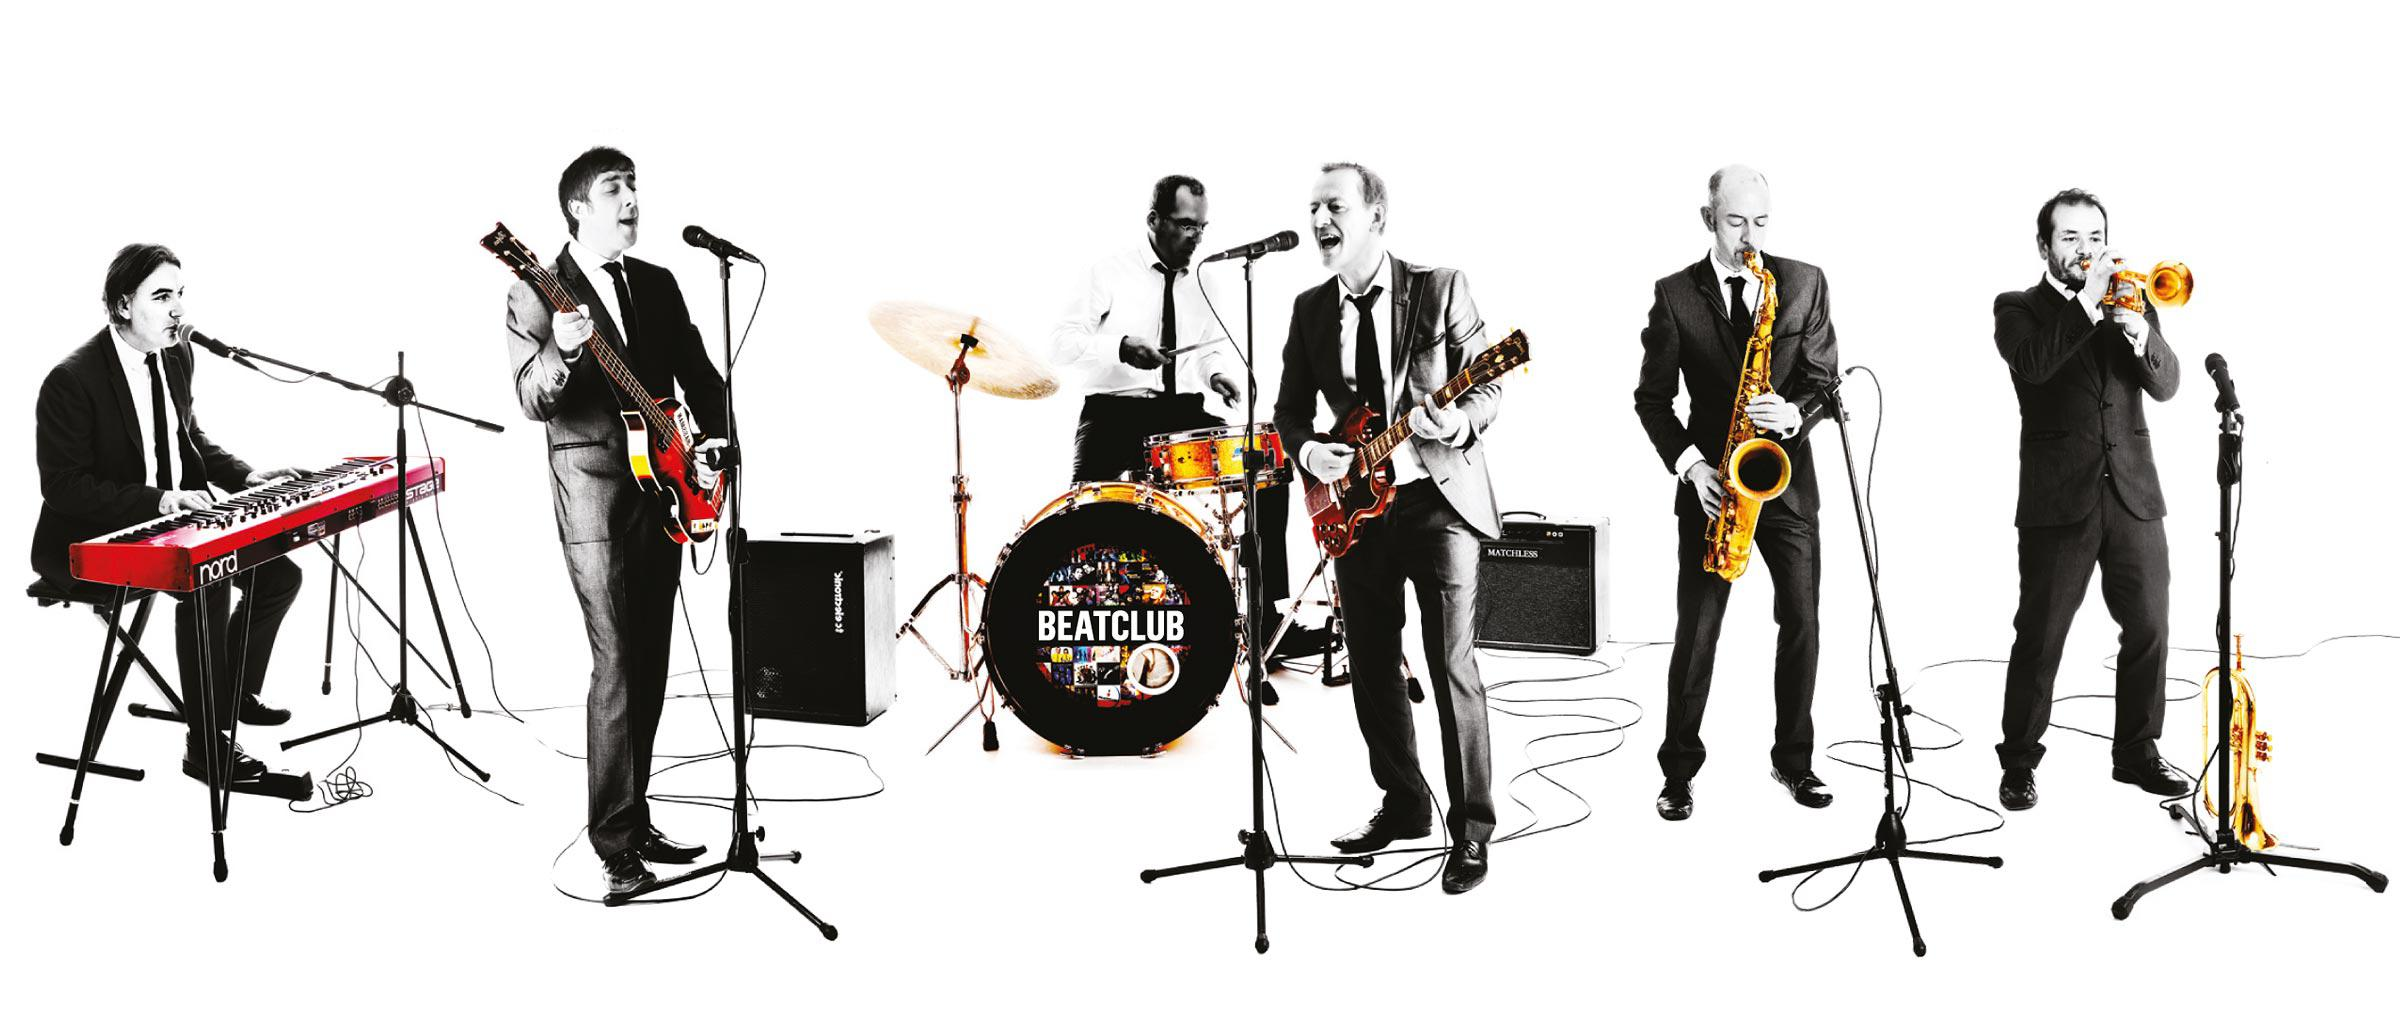

In [20]:
from IPython.display import Image
Image('last.jpg', width=416, height=416)